PCA from scratch <br>
1. xi - mean of xi<br>
2. X =  xi.transpose(xi)<br>
3. cov(xi) = X/N-1<br>
4. |cov(xi) - Lambda.I|x = 0<br>
5. find lambda(i.e eigenvalues)<br>
6. find eigenvextors for highest lambda<br>
7. EV of (6) is PC1<br>

In [ ]:
import numpy as np

step 1.

In [ ]:
x1 = [1.0,2.0,6.0,3.0,4.0,5.0]
x2 = [6.0,7.0,4.0,3.0,2.0,0.0]
target = [7.0,8.0,6.0,3.8,7.68,9.7]
x1_mean = np.mean(x1)
x2_mean = np.mean(x2)

x1 = x1 - x1_mean
x2 = x2 - x2_mean
X = np.column_stack((x1,x2))#dim 6x2
print(X)

[[-2.5         2.33333333]
 [-1.5         3.33333333]
 [ 2.5         0.33333333]
 [-0.5        -0.66666667]
 [ 0.5        -1.66666667]
 [ 1.5        -3.66666667]]


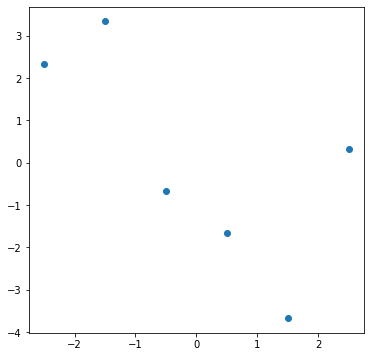

In [ ]:
import seaborn as sb
import matplotlib.pyplot as plt

plt.figure(figsize = (6,6))
plt.scatter(x1,x2)

step 2

In [ ]:
def transpose(X):
  X_T = [[0,0,0,0,0,0],[0,0,0,0,0,0]]
  for i in range(len(X)):
    for j in range(len(X[0])):
      X_T[j][i] = X[i][j]
  return(X_T)

def pdt(X,Y):
  result = [[0,0,0,0,0,0],
         [0,0,0,0,0,0],
         [0,0,0,0,0,0],
         [0,0,0,0,0,0],
         [0,0,0,0,0,0],
         [0,0,0,0,0,0]]
  for i in range(len(X)):
    for j in range(len(Y[0])):
        for k in range(len(Y)):
            result[i][j] += X[i][k] * Y[k][j]
  return(result)

def covarience(X):
  cov_X = pdt( X, transpose(X) )
  N  = 1.0 / 5
  cov_X = [[x*N for x in y] for y in cov_X]
  return(cov_X)


In [ ]:
for i in covarience(X): #dim 6x6
    print(i)


[2.3388888888888895, 2.305555555555556, -1.0944444444444443, -0.061111111111111074, -1.027777777777778, -2.4611111111111112]
[2.305555555555556, 2.6722222222222225, -0.5277777777777777, -0.2944444444444444, -1.261111111111111, -2.8944444444444444]
[-1.0944444444444443, -0.5277777777777777, 1.2722222222222224, -0.29444444444444445, 0.13888888888888884, 0.5055555555555554]
[-0.061111111111111074, -0.2944444444444444, -0.29444444444444445, 0.13888888888888884, 0.17222222222222217, 0.3388888888888888]
[-1.027777777777778, -1.261111111111111, 0.13888888888888884, 0.17222222222222217, 0.6055555555555555, 1.3722222222222222]
[-2.4611111111111112, -2.8944444444444444, 0.5055555555555554, 0.3388888888888888, 1.3722222222222222, 3.138888888888889]


step 3

In [ ]:
from numpy.linalg import eig
cov_X  = covarience(X)
eigval, eigvec = eig(cov_X)
eigval = np.sort(eigval)
eigval = np.flip(eigval)
eigvec = np.sort(eigvec)
eigvec = np.flip(eigvec)
print('E-value:',eigval ) #dim 1x6
print('E-vector',eigvec ) #dim 6x6
#e = 6x2

E-value: [8.65361966e+00 1.51304701e+00 4.59017835e-16 1.64286514e-16
 4.38901835e-17 4.27139653e-18]
E-vector [[ 0.64023017  0.59385379  0.08046042 -0.23990607 -0.27457498 -0.31752149]
 [ 0.3641861   0.25535276  0.0243171  -0.09293633 -0.16520675 -0.91810681]
 [ 0.15216591  0.14923313  0.08552682  0.04600511 -0.28229305 -0.7676429 ]
 [ 0.83610838  0.39109761  0.15743457 -0.02240888 -0.33430659 -0.43716062]
 [ 0.31374457  0.27351648  0.17597753 -0.13510506 -0.35541699 -0.55080266]
 [ 0.56200577  0.02506302 -0.21739065 -0.32468003 -0.50184356 -0.80170812]]


In [ ]:
print(eigvec[:,:1])
print(eigvec[:][0:1])
print(X[0])

[[0.64023017]
 [0.3641861 ]
 [0.15216591]
 [0.83610838]
 [0.31374457]
 [0.56200577]]
[[ 0.64023017  0.59385379  0.08046042 -0.23990607 -0.27457498 -0.31752149]]
[-2.5         2.33333333]


pca 1

In [ ]:
c = [[-2.5,2.33333333]]
c

[[-2.5, 2.33333333]]

In [ ]:
num_components = 1
eigenvector_subset = eigvec[:,:1] #dim 6x1
#Step-6
X_reduced = np.dot(eigenvector_subset , [[-2.5,2.33333333]])  #dim (6,1) and (1,2)
#return
print(X_reduced)

####6x2 and 6x2

### 1x6

[[-1.60057543  1.4938704 ]
 [-0.91046524  0.84976756]
 [-0.38041477  0.35505378]
 [-2.09027095  1.95091955]
 [-0.78436142  0.73207066]
 [-1.40501442  1.31134679]]


In [ ]:
import pandas as pd
principal_df = pd.DataFrame(X_reduced , columns = ['PC1','PC2'])

print(principal_df)

In [ ]:
import seaborn as sb
import matplotlib.pyplot as plt

plt.figure(figsize = (6,6))
sb.scatterplot(data = principal_df , x = 'PC1',y = 'PC2' , s = 60 , palette= 'icefire')
